In [38]:
import pandas as pd
import numpy as np

import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin

#Model
from sklearn.linear_model import LogisticRegression

#Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#Sampling
from sklearn.preprocessing import  PolynomialFeatures
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [2]:
#data = pd.read_csv('train_loan_data.csv')
train = pd.read_csv('train_loan_data.csv')
test = pd.read_csv('test_loan_data.csv')
data = pd.concat([train,test],axis = 0)


In [3]:
data

,addr_state,annual_inc,earliest_cr_line,emp_length,emp_title,fico_range_high,fico_range_low,grade,home_ownership,application_type,...,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,term,title,total_acc,verification_status,loan_status
0,CO,85000.0,Jul-1997,10+ years,Deputy,744.0,740.0,E,MORTGAGE,Individual,...,0.0,debt_consolidation,5338.0,93.6,E1,60 months,Debt consolidation,8.0,Source Verified,Charged Off
1,CA,40000.0,Apr-1987,10+ years,Department of Veterans Affairs,724.0,720.0,B,RENT,Individual,...,0.0,debt_consolidation,19944.0,60.3,B1,36 months,Credit Loan,12.0,Verified,Fully Paid
2,FL,60000.0,Aug-2007,10+ years,Marble polishing,679.0,675.0,B,MORTGAGE,Individual,...,0.0,debt_consolidation,23199.0,88.5,B5,36 months,Debt consolidation,16.0,Source Verified,Fully Paid
3,IL,100742.0,Sep-1980,10+ years,printer,664.0,660.0,B,MORTGAGE,Individual,...,0.0,debt_consolidation,18425.0,69.0,B2,36 months,Debt consolidation,19.0,Source Verified,Fully Paid
4,MD,80000.0,Jul-1999,10+ years,Southern Mgmt,669.0,665.0,F,RENT,Individual,...,0.0,debt_consolidation,34370.0,90.0,F5,60 months,Debt Connsolidation,59.0,Verified,Fully Paid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,MO,38500.0,Sep-2010,4 years,lighting coordinator,679.0,675.0,D,RENT,Individual,...,0.0,debt_consolidation,5816.0,60.0,D4,36 months,Debt consolidation,10.0,Not Verified,NaN
19996,VA,80000.0,Dec-1998,3 years,Contract & Compliance Manager,674.0,670.0,D,MORTGAGE,Individual,...,0.0,debt_consolidation,13886.0,75.1,D4,60 months,Debt consolidation,30.0,Source Verified,NaN
19997,TX,95000.0,May-1996,10+ years,Pharmacist,729.0,725.0,B,MORTGAGE,Individual,...,0.0,debt_consolidation,43166.0,60.7,B5,36 months,Debt consolidation,29.0,Source Verified,NaN
19998,FL,35000.0,Mar-2003,10+ years,Manager In Training,809.0,805.0,A,MORTGAGE,Individual,...,0.0,car,1110.0,4.4,A5,36 months,Car financing,19.0,Not Verified,NaN


In [4]:
data.isna().sum()

addr_state                  0
annual_inc                  0
earliest_cr_line            0
emp_length               5846
emp_title                6396
fico_range_high             0
fico_range_low              0
grade                       0
home_ownership              0
application_type            0
initial_list_status         0
int_rate                    0
loan_amnt                   0
num_actv_bc_tl           4959
mort_acc                 3475
tot_cur_bal              4959
open_acc                    0
pub_rec                     0
pub_rec_bankruptcies       42
purpose                     0
revol_bal                   0
revol_util                 66
sub_grade                   0
term                        0
title                    1217
total_acc                   0
verification_status         0
loan_status             20000
dtype: int64

In [5]:
data["emp_length"].unique()

array(['10+ years', nan, '3 years', '< 1 year', '1 year', '8 years',
       '7 years', '4 years', '2 years', '5 years', '6 years', '9 years'],
      dtype=object)

In [6]:
data["grade"].unique()

array(['E', 'B', 'F', 'D', 'C', 'A', 'G'], dtype=object)

In [7]:
data["emp_title"].nunique()

44316

In [8]:
#Dropping emp_title

data.drop(columns=['emp_title'], inplace=True)

In [9]:
data

,addr_state,annual_inc,earliest_cr_line,emp_length,fico_range_high,fico_range_low,grade,home_ownership,application_type,initial_list_status,...,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,term,title,total_acc,verification_status,loan_status
0,CO,85000.0,Jul-1997,10+ years,744.0,740.0,E,MORTGAGE,Individual,w,...,0.0,debt_consolidation,5338.0,93.6,E1,60 months,Debt consolidation,8.0,Source Verified,Charged Off
1,CA,40000.0,Apr-1987,10+ years,724.0,720.0,B,RENT,Individual,w,...,0.0,debt_consolidation,19944.0,60.3,B1,36 months,Credit Loan,12.0,Verified,Fully Paid
2,FL,60000.0,Aug-2007,10+ years,679.0,675.0,B,MORTGAGE,Individual,w,...,0.0,debt_consolidation,23199.0,88.5,B5,36 months,Debt consolidation,16.0,Source Verified,Fully Paid
3,IL,100742.0,Sep-1980,10+ years,664.0,660.0,B,MORTGAGE,Individual,w,...,0.0,debt_consolidation,18425.0,69.0,B2,36 months,Debt consolidation,19.0,Source Verified,Fully Paid
4,MD,80000.0,Jul-1999,10+ years,669.0,665.0,F,RENT,Individual,f,...,0.0,debt_consolidation,34370.0,90.0,F5,60 months,Debt Connsolidation,59.0,Verified,Fully Paid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,MO,38500.0,Sep-2010,4 years,679.0,675.0,D,RENT,Individual,w,...,0.0,debt_consolidation,5816.0,60.0,D4,36 months,Debt consolidation,10.0,Not Verified,NaN
19996,VA,80000.0,Dec-1998,3 years,674.0,670.0,D,MORTGAGE,Individual,f,...,0.0,debt_consolidation,13886.0,75.1,D4,60 months,Debt consolidation,30.0,Source Verified,NaN
19997,TX,95000.0,May-1996,10+ years,729.0,725.0,B,MORTGAGE,Individual,f,...,0.0,debt_consolidation,43166.0,60.7,B5,36 months,Debt consolidation,29.0,Source Verified,NaN
19998,FL,35000.0,Mar-2003,10+ years,809.0,805.0,A,MORTGAGE,Individual,w,...,0.0,car,1110.0,4.4,A5,36 months,Car financing,19.0,Not Verified,NaN


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 19999
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   addr_state            100000 non-null  object 
 1   annual_inc            100000 non-null  float64
 2   earliest_cr_line      100000 non-null  object 
 3   emp_length            94154 non-null   object 
 4   fico_range_high       100000 non-null  float64
 5   fico_range_low        100000 non-null  float64
 6   grade                 100000 non-null  object 
 7   home_ownership        100000 non-null  object 
 8   application_type      100000 non-null  object 
 9   initial_list_status   100000 non-null  object 
 10  int_rate              100000 non-null  float64
 11  loan_amnt             100000 non-null  float64
 12  num_actv_bc_tl        95041 non-null   float64
 13  mort_acc              96525 non-null   float64
 14  tot_cur_bal           95041 non-null   float64
 15  o

In [11]:
data["addr_state"].unique()

array(['CO', 'CA', 'FL', 'IL', 'MD', 'NY', 'PA', 'WI', 'UT', 'TX', 'AL',
       'KS', 'AR', 'AZ', 'MI', 'MN', 'LA', 'HI', 'NC', 'VT', 'OK', 'KY',
       'ME', 'CT', 'AK', 'NJ', 'IN', 'GA', 'MA', 'OR', 'NM', 'VA', 'TN',
       'SC', 'NV', 'WY', 'WA', 'WV', 'MO', 'OH', 'MS', 'DC', 'NE', 'ID',
       'NH', 'RI', 'SD', 'MT', 'DE', 'ND', 'IA'], dtype=object)

C:\Users\vigne\AppData\Local\Temp\ipykernel_14120\2898799600.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


<Axes: >

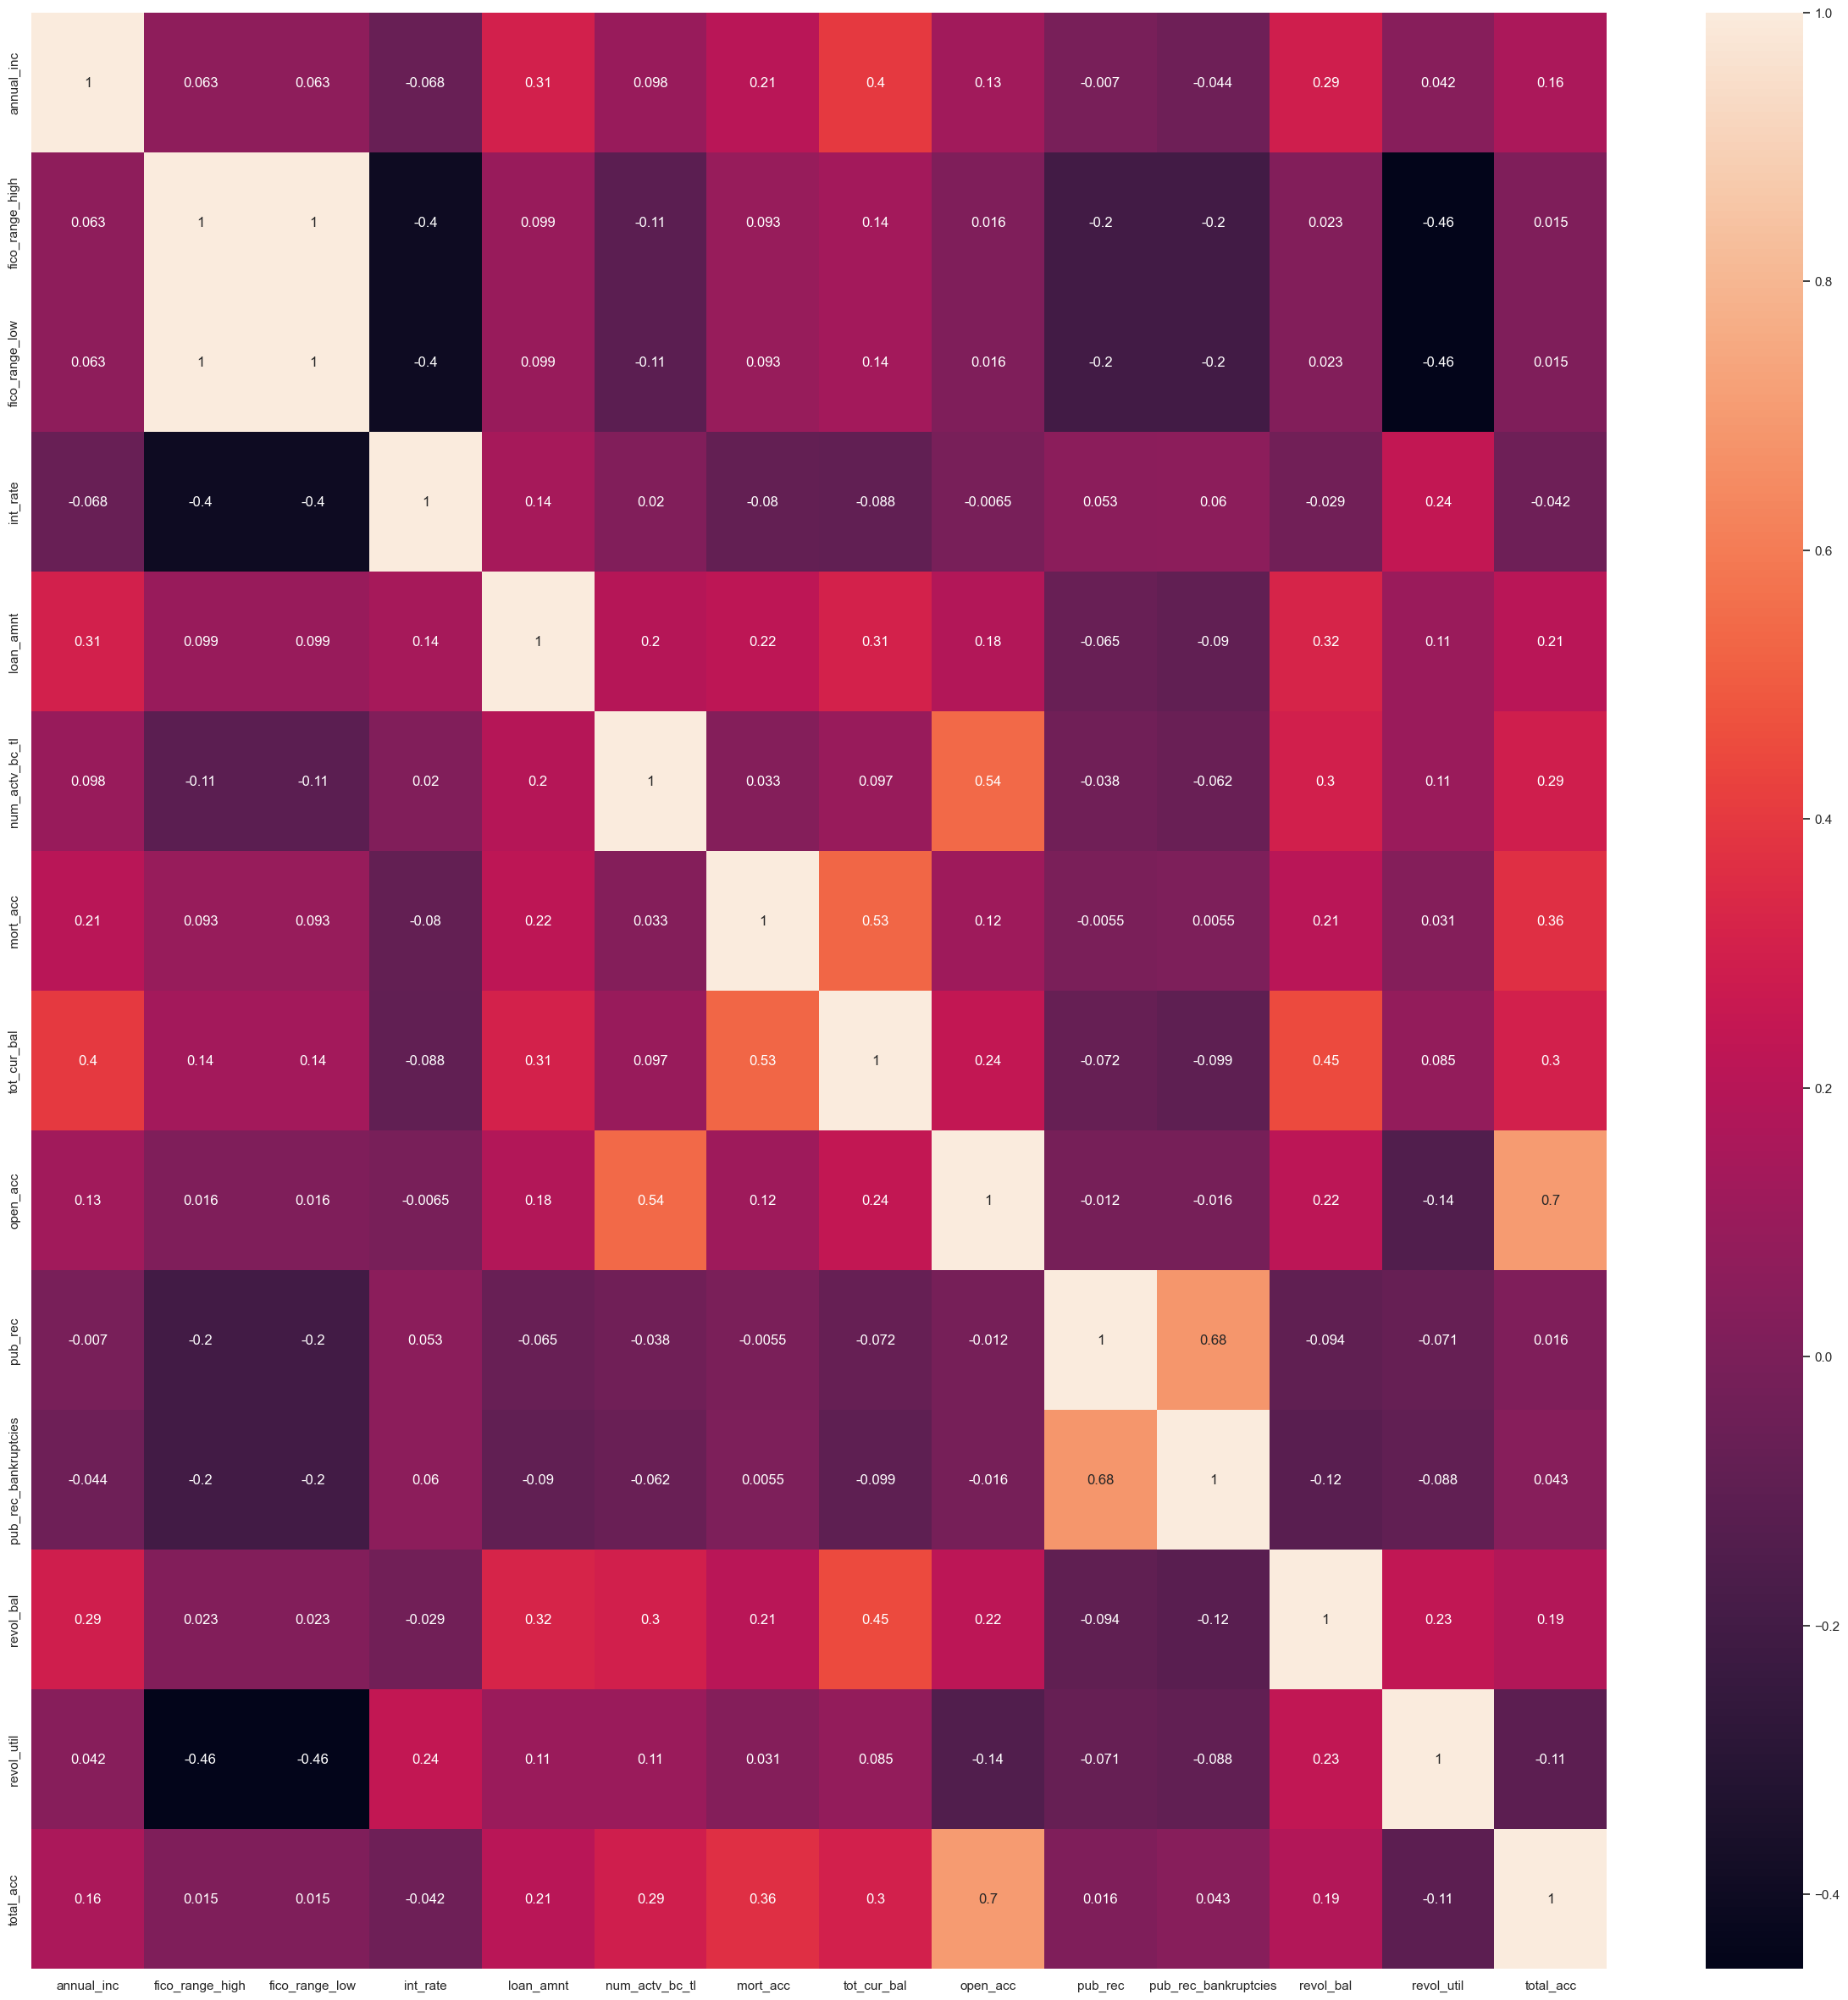

In [12]:
sns.set(rc={'figure.figsize':(30,30)})
sns.heatmap(data.corr(), annot=True)


In [13]:
#Dropping addr_state column
data.drop(columns=['addr_state', 'title', 'sub_grade'], inplace=True)

In [14]:
data

,annual_inc,earliest_cr_line,emp_length,fico_range_high,fico_range_low,grade,home_ownership,application_type,initial_list_status,int_rate,...,open_acc,pub_rec,pub_rec_bankruptcies,purpose,revol_bal,revol_util,term,total_acc,verification_status,loan_status
0,85000.0,Jul-1997,10+ years,744.0,740.0,E,MORTGAGE,Individual,w,18.99,...,7.0,0.0,0.0,debt_consolidation,5338.0,93.6,60 months,8.0,Source Verified,Charged Off
1,40000.0,Apr-1987,10+ years,724.0,720.0,B,RENT,Individual,w,10.16,...,5.0,0.0,0.0,debt_consolidation,19944.0,60.3,36 months,12.0,Verified,Fully Paid
2,60000.0,Aug-2007,10+ years,679.0,675.0,B,MORTGAGE,Individual,w,11.47,...,7.0,0.0,0.0,debt_consolidation,23199.0,88.5,36 months,16.0,Source Verified,Fully Paid
3,100742.0,Sep-1980,10+ years,664.0,660.0,B,MORTGAGE,Individual,w,9.16,...,12.0,0.0,0.0,debt_consolidation,18425.0,69.0,36 months,19.0,Source Verified,Fully Paid
4,80000.0,Jul-1999,10+ years,669.0,665.0,F,RENT,Individual,f,23.83,...,23.0,0.0,0.0,debt_consolidation,34370.0,90.0,60 months,59.0,Verified,Fully Paid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,38500.0,Sep-2010,4 years,679.0,675.0,D,RENT,Individual,w,17.57,...,10.0,0.0,0.0,debt_consolidation,5816.0,60.0,36 months,10.0,Not Verified,NaN
19996,80000.0,Dec-1998,3 years,674.0,670.0,D,MORTGAGE,Individual,f,18.92,...,9.0,0.0,0.0,debt_consolidation,13886.0,75.1,60 months,30.0,Source Verified,NaN
19997,95000.0,May-1996,10+ years,729.0,725.0,B,MORTGAGE,Individual,f,11.22,...,10.0,0.0,0.0,debt_consolidation,43166.0,60.7,36 months,29.0,Source Verified,NaN
19998,35000.0,Mar-2003,10+ years,809.0,805.0,A,MORTGAGE,Individual,w,7.89,...,9.0,0.0,0.0,car,1110.0,4.4,36 months,19.0,Not Verified,NaN


In [15]:
#X['earliest_cr_line'].apply(lambda year : year.split("-")[1]).astype('int64').apply(lambda year : 2023-year)

In [16]:
class CustomTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        #print('\n>>>>>>>init() called.\n')
        pass
    def fit(self, X, y = None):
        #print('\n>>>>>>>fit() called.\n')
        return self
    def transform(self, X, y = None):
        #print('\n>>>>>>>transform() called.\n')
        #print("\n>>>> Input : ",X)
        X.drop(columns=['emp_title','addr_state', 'title', 'sub_grade'], inplace=True)
        X['earliest_cr_line'] = X['earliest_cr_line'].apply(lambda year : year.split("-")[1]).astype('int64').apply(lambda year : 2023-year)
        #print("\n>>>> Output : ",X_)
        #print("\n>>>>>>> Custom Transformer Called")
        return X

In [17]:
data.select_dtypes(include=np.object).columns

C:\Users\vigne\AppData\Local\Temp\ipykernel_14120\1641231976.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data.select_dtypes(include=np.object).columns


Index(['earliest_cr_line', 'emp_length', 'grade', 'home_ownership',
       'application_type', 'initial_list_status', 'purpose', 'term',
       'verification_status', 'loan_status'],
      dtype='object')

In [18]:
data["loan_status"].unique()

array(['Charged Off', 'Fully Paid', nan], dtype=object)

In [19]:
custom_pipleline = Pipeline([
    ('Custom_Preprocessing',CustomTransformer()),
])

In [20]:
preprocess_categorical_encoding = Pipeline([
          ('categ_imputation', SimpleImputer(strategy='most_frequent')),
          ('onehot', OneHotEncoder(sparse=False, handle_unknown='ignore'))
         ])

numerical_encoding_scaling = Pipeline([
                                       ('imputation', SimpleImputer(strategy='mean')),
                                       ('scale', MinMaxScaler())])
    
category_ = Pipeline([
   ('ColumnTransform',custom_pipleline),
   ('categorical', preprocess_categorical_encoding)
])    
 
preprocess_full = ColumnTransformer(
    transformers=
    [
    ('numerical_prprocessing',numerical_encoding_scaling,['annual_inc', 'fico_range_high', 'fico_range_low', 'int_rate',
       'loan_amnt', 'num_actv_bc_tl', 'mort_acc', 'tot_cur_bal', 'open_acc','pub_rec', 'pub_rec_bankruptcies', 'revol_bal', 'revol_util',
        'total_acc']),
    ('categoral_preprocessing',category_,['earliest_cr_line', 'emp_length', 'grade', 'home_ownership',
       'application_type', 'initial_list_status', 'purpose', 
       'term', 'verification_status','emp_title','addr_state', 'title', 'sub_grade'   ])
    
    ]
)
    
    

In [21]:
pipe_model = Pipeline([
    ('preprocess',preprocess_full),
    ('model', LogisticRegression())
])

In [22]:
X = train.drop(columns = "loan_status")
y = train['loan_status']

In [23]:
pipe_model.fit(X,y)

C:\Users\vigne\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\vigne\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numerical_prprocessing',
                                                  Pipeline(steps=[('imputation',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   MinMaxScaler())]),
                                                  ['annual_inc',
                                                   'fico_range_high',
                                                   'fico_range_low', 'int_rate',
                                                   'loan_amnt',
                                                   'num_actv_bc_tl', 'mort_acc',
                                                   'tot_cur_bal', 'open_acc',
                                                   'pub_rec',
                                                   'pub_rec_bankruptcies',
                                                   'revol_bal', 'revol_util',
                                                   'tota...
                                                                   Pipeline(steps=[('categ_imputation',
                                                                                    SimpleImputer(strategy='most_frequent')),
                                                                                   ('onehot',
                                                                                    OneHotEncoder(handle_unknown='ignore',
                                                                                                  sparse=False))]))]),
                                                  ['earliest_cr_line',
                                                   'emp_length', 'grade',
                                                   'home_ownership',
                                                   'application_type',
                                                   'initial_list_status',
                                                   'purpose', 'term',
                                                   'verification_status',
                                                   'emp_title', 'addr_state',
                                                   'title', 'sub_grade'])])),
                ('model', LogisticRegression())])

In [24]:
pipe_model

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numerical_prprocessing',
                                                  Pipeline(steps=[('imputation',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   MinMaxScaler())]),
                                                  ['annual_inc',
                                                   'fico_range_high',
                                                   'fico_range_low', 'int_rate',
                                                   'loan_amnt',
                                                   'num_actv_bc_tl', 'mort_acc',
                                                   'tot_cur_bal', 'open_acc',
                                                   'pub_rec',
                                                   'pub_rec_bankruptcies',
                                                   'revol_bal', 'revol_util',
                                                   'tota...
                                                                   Pipeline(steps=[('categ_imputation',
                                                                                    SimpleImputer(strategy='most_frequent')),
                                                                                   ('onehot',
                                                                                    OneHotEncoder(handle_unknown='ignore',
                                                                                                  sparse=False))]))]),
                                                  ['earliest_cr_line',
                                                   'emp_length', 'grade',
                                                   'home_ownership',
                                                   'application_type',
                                                   'initial_list_status',
                                                   'purpose', 'term',
                                                   'verification_status',
                                                   'emp_title', 'addr_state',
                                                   'title', 'sub_grade'])])),
                ('model', LogisticRegression())])

In [25]:
train_pred = pipe_model.predict(X)
test_pred = pipe_model.predict(test)

In [26]:
test_pred

array(['Fully Paid', 'Fully Paid', 'Fully Paid', ..., 'Fully Paid',
       'Fully Paid', 'Fully Paid'], dtype=object)

In [27]:
print("Train Result")
print(confusion_matrix(y, train_pred))
print(accuracy_score(y, train_pred))

Train Result
[[  737 15233]
 [  689 63341]]
0.800975


In [28]:
test_y = pd.read_csv("test_results.csv")

In [29]:
print("Test Result")
print(confusion_matrix(test_y, test_pred))
print(accuracy_score(test_y, test_pred))

Test Result
[[  191  3802]
 [  150 15857]]
0.8024


In [30]:
test

,addr_state,annual_inc,earliest_cr_line,emp_length,emp_title,fico_range_high,fico_range_low,grade,home_ownership,application_type,...,pub_rec,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,term,title,total_acc,verification_status
0,MO,50000.0,May-2012,1 year,Tower technician,719.0,715.0,C,OWN,Individual,...,0.0,0.0,debt_consolidation,2568.0,9.8,C4,36 months,Debt consolidation,11.0,Source Verified
1,HI,92000.0,Dec-2001,10+ years,Supervisor,684.0,680.0,B,RENT,Individual,...,0.0,0.0,debt_consolidation,30394.0,75.4,B2,36 months,Debt consolidation,35.0,Source Verified
2,TX,89000.0,Mar-1989,10+ years,APPLICATIONS PROGRAMMER,679.0,675.0,B,MORTGAGE,Individual,...,0.0,0.0,credit_card,38400.0,75.3,B2,60 months,Credit card refinancing,41.0,Not Verified
3,CA,33000.0,Nov-2004,9 years,San Diego Unified School District,674.0,670.0,C,RENT,Individual,...,1.0,1.0,debt_consolidation,21224.0,69.4,C1,36 months,Breathing Room,16.0,Not Verified
4,MI,35580.0,Feb-1997,NaN,NaN,704.0,700.0,B,MORTGAGE,Individual,...,0.0,0.0,debt_consolidation,3471.0,39.4,B5,36 months,debitconsolidation,19.0,Verified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,MO,38500.0,Sep-2010,4 years,lighting coordinator,679.0,675.0,D,RENT,Individual,...,0.0,0.0,debt_consolidation,5816.0,60.0,D4,36 months,Debt consolidation,10.0,Not Verified
19996,VA,80000.0,Dec-1998,3 years,Contract & Compliance Manager,674.0,670.0,D,MORTGAGE,Individual,...,0.0,0.0,debt_consolidation,13886.0,75.1,D4,60 months,Debt consolidation,30.0,Source Verified
19997,TX,95000.0,May-1996,10+ years,Pharmacist,729.0,725.0,B,MORTGAGE,Individual,...,0.0,0.0,debt_consolidation,43166.0,60.7,B5,36 months,Debt consolidation,29.0,Source Verified
19998,FL,35000.0,Mar-2003,10+ years,Manager In Training,809.0,805.0,A,MORTGAGE,Individual,...,0.0,0.0,car,1110.0,4.4,A5,36 months,Car financing,19.0,Not Verified


In [31]:
test_predict_logistic = pipe_model.predict_proba(test)[:,1]

In [32]:
np.where(test_predict_logistic>0.6,1,0)

array([1, 1, 1, ..., 1, 1, 0])

# Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
random_forest_pipe_model = Pipeline([
    ('preprocess',preprocess_full),
    ('model', RandomForestClassifier())
])

In [35]:
    random_forest_pipe_model.fit(X,y)
    train_pred = random_forest_pipe_model.predict(X)
    print('Train Confusion Matrix')
    print(confusion_matrix(y, train_pred))
    print('Test Confusion Matrix')
    test_pred = random_forest_pipe_model.predict(test)
    print(confusion_matrix(test_y, test_pred))
    print(classification_report(y, train_pred))
    print(classification_report(test_y, test_pred))

C:\Users\vigne\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Train Confusion Matrix
[[15970     0]
 [    0 64030]]
Test Confusion Matrix
[[  237  3756]
 [  227 15780]]
              precision    recall  f1-score   support

 Charged Off       1.00      1.00      1.00     15970
  Fully Paid       1.00      1.00      1.00     64030

    accuracy                           1.00     80000
   macro avg       1.00      1.00      1.00     80000
weighted avg       1.00      1.00      1.00     80000

              precision    recall  f1-score   support

 Charged Off       0.51      0.06      0.11      3993
  Fully Paid       0.81      0.99      0.89     16007

    accuracy                           0.80     20000
   macro avg       0.66      0.52      0.50     20000
weighted avg       0.75      0.80      0.73     20000



In [37]:
train['loan_status'].value_counts(normalize=True)


Fully Paid     0.800375
Charged Off    0.199625
Name: loan_status, dtype: float64

# Sampling

In [39]:
#Under Sampling
rus = RandomUnderSampler(random_state=42)
X_b,y_b = rus.fit_resample(X,y)

In [40]:
#Over Sampling
ros = RandomOverSampler(random_state=42)
X_b_,y_b_ = ros.fit_resample(X,y)

In [41]:
y_b.value_counts()


Charged Off    15970
Fully Paid     15970
Name: loan_status, dtype: int64

In [42]:
y_b_.value_counts()


Charged Off    64030
Fully Paid     64030
Name: loan_status, dtype: int64

In [43]:
random_forest_pipe_model = Pipeline([
    ('preprocess',preprocess_full),
    ('model', RandomForestClassifier())
])

In [44]:
random_forest_pipe_model.fit(X_b,y_b)


C:\Users\vigne\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numerical_prprocessing',
                                                  Pipeline(steps=[('imputation',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   MinMaxScaler())]),
                                                  ['annual_inc',
                                                   'fico_range_high',
                                                   'fico_range_low', 'int_rate',
                                                   'loan_amnt',
                                                   'num_actv_bc_tl', 'mort_acc',
                                                   'tot_cur_bal', 'open_acc',
                                                   'pub_rec',
                                                   'pub_rec_bankruptcies',
                                                   'revol_bal', 'revol_util',
                                                   'tota...
                                                                   Pipeline(steps=[('categ_imputation',
                                                                                    SimpleImputer(strategy='most_frequent')),
                                                                                   ('onehot',
                                                                                    OneHotEncoder(handle_unknown='ignore',
                                                                                                  sparse=False))]))]),
                                                  ['earliest_cr_line',
                                                   'emp_length', 'grade',
                                                   'home_ownership',
                                                   'application_type',
                                                   'initial_list_status',
                                                   'purpose', 'term',
                                                   'verification_status',
                                                   'emp_title', 'addr_state',
                                                   'title', 'sub_grade'])])),
                ('model', RandomForestClassifier())])

In [46]:
    #With Under sampling
    train_pred = random_forest_pipe_model.predict(X_b)
    print('Train Confusion Matrix')
    print(confusion_matrix(y_b, train_pred))
    print('Test Confusion Matrix')
    test_pred = random_forest_pipe_model.predict(test)
    print(confusion_matrix(test_y, test_pred))
    print(classification_report(y_b, train_pred))
    print(classification_report(test_y, test_pred))

Train Confusion Matrix
[[15970     0]
 [    0 15970]]
Test Confusion Matrix
[[2741 1252]
 [6243 9764]]
              precision    recall  f1-score   support

 Charged Off       1.00      1.00      1.00     15970
  Fully Paid       1.00      1.00      1.00     15970

    accuracy                           1.00     31940
   macro avg       1.00      1.00      1.00     31940
weighted avg       1.00      1.00      1.00     31940

              precision    recall  f1-score   support

 Charged Off       0.31      0.69      0.42      3993
  Fully Paid       0.89      0.61      0.72     16007

    accuracy                           0.63     20000
   macro avg       0.60      0.65      0.57     20000
weighted avg       0.77      0.63      0.66     20000



In [48]:
    #With Over sampling
    random_forest_pipe_model.fit(X_b_,y_b_)
    train_pred = random_forest_pipe_model.predict(X_b_)
    print('Train Confusion Matrix')
    print(confusion_matrix(y_b_, train_pred))
    print('Test Confusion Matrix')
    test_pred = random_forest_pipe_model.predict(test)
    print(confusion_matrix(test_y, test_pred))
    print(classification_report(y_b_, train_pred))
    print(classification_report(test_y, test_pred))

C:\Users\vigne\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Train Confusion Matrix
[[64030     0]
 [    0 64030]]
Test Confusion Matrix
[[  695  3298]
 [  880 15127]]
              precision    recall  f1-score   support

 Charged Off       1.00      1.00      1.00     64030
  Fully Paid       1.00      1.00      1.00     64030

    accuracy                           1.00    128060
   macro avg       1.00      1.00      1.00    128060
weighted avg       1.00      1.00      1.00    128060

              precision    recall  f1-score   support

 Charged Off       0.44      0.17      0.25      3993
  Fully Paid       0.82      0.95      0.88     16007

    accuracy                           0.79     20000
   macro avg       0.63      0.56      0.56     20000
weighted avg       0.75      0.79      0.75     20000



# With Polynomial

In [49]:
pipe_model_poly_randomforest = Pipeline([
    ('preprocess',preprocess_full),
    ('polynomial', PolynomialFeatures(degree=2)),
    ('model', RandomForestClassifier())
])


In [52]:
    #With Under sampling
    pipe_model_poly_randomforest.fit(X_b,y_b)
    train_pred = pipe_model_poly_randomforest.predict(X_b)
    print('Train Confusion Matrix')
    print(confusion_matrix(y_b, train_pred))
    print('Test Confusion Matrix')
    test_pred = pipe_model_poly_randomforest.predict(test)
    print(confusion_matrix(test_y, test_pred))
    print(classification_report(y_b, train_pred))
    print(classification_report(test_y, test_pred))

C:\Users\vigne\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Train Confusion Matrix
[[15970     0]
 [    1 15969]]
Test Confusion Matrix
[[2740 1253]
 [6230 9777]]
              precision    recall  f1-score   support

 Charged Off       1.00      1.00      1.00     15970
  Fully Paid       1.00      1.00      1.00     15970

    accuracy                           1.00     31940
   macro avg       1.00      1.00      1.00     31940
weighted avg       1.00      1.00      1.00     31940

              precision    recall  f1-score   support

 Charged Off       0.31      0.69      0.42      3993
  Fully Paid       0.89      0.61      0.72     16007

    accuracy                           0.63     20000
   macro avg       0.60      0.65      0.57     20000
weighted avg       0.77      0.63      0.66     20000



In [ ]:
    #With Over sampling
    pipe_model_poly_randomforest.fit(X_b_,y_b_)
    train_pred = pipe_model_poly_randomforest.predict(X_b_)
    print('Train Confusion Matrix')
    print(confusion_matrix(y_b_, train_pred))
    print('Test Confusion Matrix')
    test_pred = pipe_model_poly_randomforest.predict(test)
    print(confusion_matrix(test_y, test_pred))
    print(classification_report(y_b_, train_pred))
    print(classification_report(test_y, test_pred))

C:\Users\vigne\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
